# 1. Linear Regression
### 1.1 선형회귀란?
* 독립 변수들과 종속 변수 간의 관계를 1차 함수로 예측.


### 1.2 선형회귀의 잔차
* 선형회귀에서 종속 변수는 관찰의 결과인 확률변수이기 때문에 오차를 포함한다.
* 오차를 알기 위해서는, <span style="color: #2D3748; background-color:#fff5b1;">종속 변수를 예측하기 위한 모든 독립 변수들을 알아야 하지만 현실적으로 불가능</span>
* 따라서 선형회귀에서는 오차를 사용하지 않고, 표본집단으로 학습된 모델의 예측값과 실제 관측값 사이의 차이인 잔차를 이용
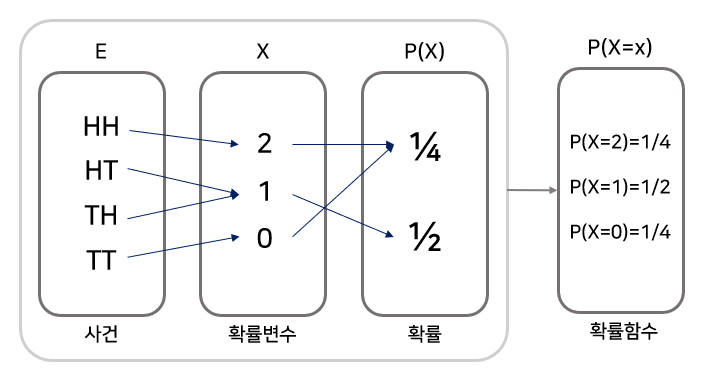


### 1.3 선형회귀의 가정
1. <U>**선형성**</U>: 예측하고자 하는 종속변수 y와 독립변수 x간에 선형성을 만족해야 한다.
1. <U>**정규성 가정**</U>: <span style="color: #2D3748; background-color:#fff5b1;">잔차는 정규 분포를 따른다고 가정한다. -> <U>정규분포 : 평균은 0, 분산은 1 (그러므로 잔차의 합은 0)</span></U>
2. <U>**등분산성 가정**</U> : 잔차의 분산은 일정하다. -> 모델이 예측한 값의 크기와 상관없이, 잔차의 크기가 일정하게 분포
3. <U>**독립성 가정**</U> : 모든 잔차들은 서로 독립적이다.

##### 1.3.1 <U>선형성</U>
* 선형성을 만족하지 않다는 것은 독립변수가 종속변수를 설명하지 못한다는 것, 즉 선형성 만족하지 않는 독립변수는 제거
* 예시) iris 데이터에서 종속 변수를 설명 못하는 독립 변수 제거하는 경우
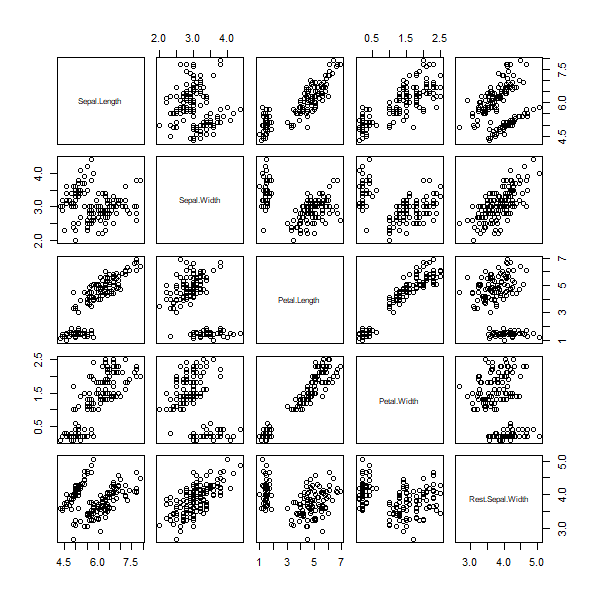

##### 1.3.2 <U>정규성</U> 가정 시각화
* 잔차가 정규분포 형태를 띈다는 것은 회귀식이 독립 변수와 종속변수의 관계를 잘 설명했다는 것.

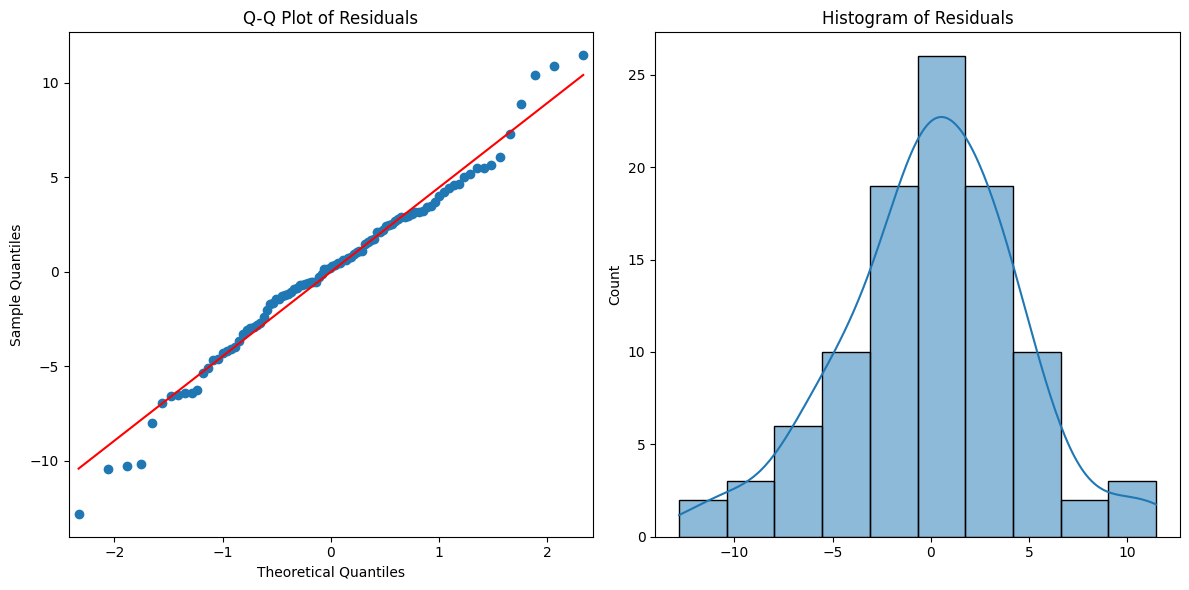

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# 데이터 생성: 공부한 시간에 따른 성적
np.random.seed(1)
study_hours = np.random.uniform(1, 10, 100)  # 1~10시간 사이의 공부 시간
true_scores = 50 + 5 * study_hours  # 공부 시간에 따른 성적 (기울기 5, 절편 50)
errors = np.random.normal(0, 5, 100)  # 평균이 0이고 표준편차가 5인 정규분포 오차 추가
scores = true_scores + errors  # 실제 성적은 오차를 포함

# 선형 회귀 모델 피팅
X = sm.add_constant(study_hours)
model = sm.OLS(scores, X)
results = model.fit()

# 잔차 계산
residuals = results.resid

# Q-Q plot으로 잔차의 정규성 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 1. Q-Q plot
sm.qqplot(residuals, line='s', ax=ax[0])
ax[0].set_title("Q-Q Plot of Residuals")

# 2. 히스토그램으로 잔차 분포 확인
sns.histplot(residuals, kde=True, ax=ax[1])
ax[1].set_title("Histogram of Residuals")

plt.tight_layout()
plt.show()


##### 1.3.3 <U>등분산성</U> 시각화
* 잔차의 분산이 같다는 것은 특정한 패턴 없이 고르게 분포했다는 것.
* 아래 사진과 같이 잔차의 분포가 특정한 패턴을 갖는 다는 것은 잔차의 분산이 일정하지 않고, 데이터 구간에 따라 잔차가 다르게 분포 -> 회귀 모델이 데이터의 모든 구간에서 일관되게 예측하지 못 함.
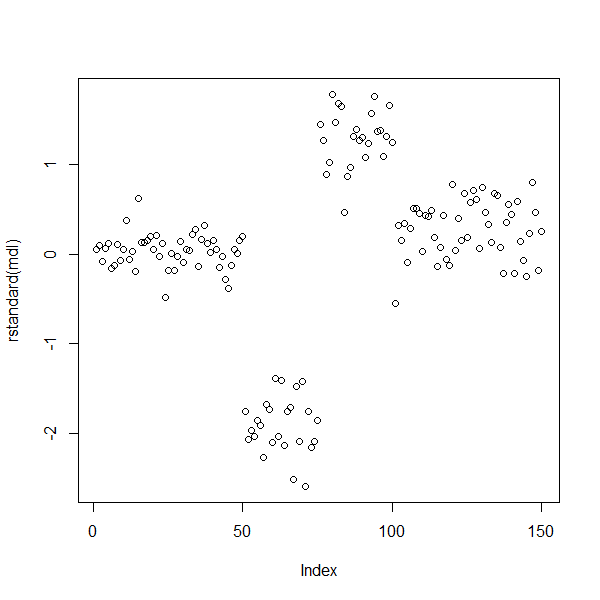

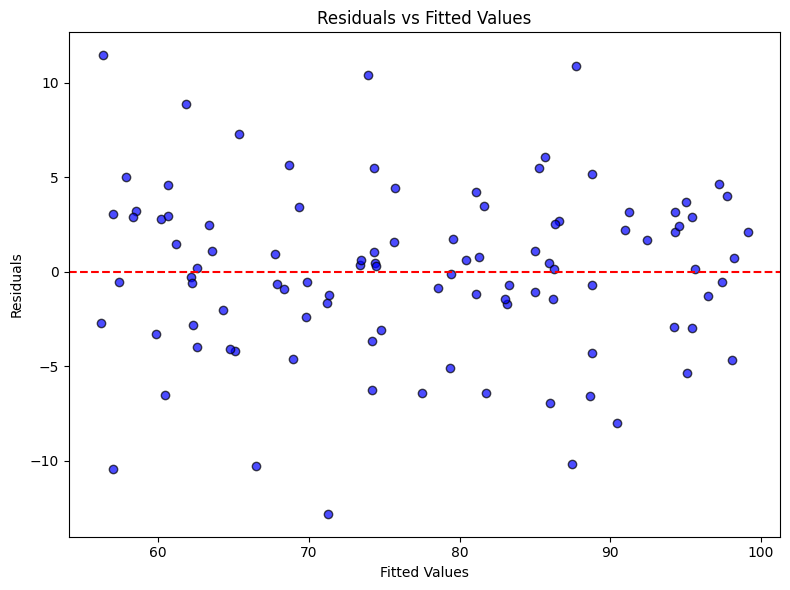

In [11]:
# 공부 시간과 성적 데이터가 제대로 일치하는지 확인 후 다시 시각화
predicted_values = results.fittedvalues  # 예측 값

# 예상 값과 잔차의 크기를 동일하게 맞추기 위한 조치
if len(predicted_values) == len(residuals):
    fig, ax = plt.subplots(figsize=(8, 6))

    # 잔차 vs 예측 값 플롯 (잔차의 분산이 일정한지 확인)
    ax.scatter(predicted_values, residuals, color='blue', edgecolor='k', alpha=0.7)
    ax.axhline(y=0, color='red', linestyle='--')
    ax.set_xlabel("Fitted Values")
    ax.set_ylabel("Residuals")
    ax.set_title("Residuals vs Fitted Values")

    plt.tight_layout()
    plt.show()


##### 1.3.5 독립성 가정
* 다중 회귀분석에서 중요한 기본 가정으로, 단순 회귀분석에서는 해당되지 않는다.
* 독립변수들 간의 상관관계가 존재하는 모델의 회귀분석 결과를 보면 유의미 했던 변수가 유의미하지 않는 것과 같은 결과를 나타내게 됨.

# Reference
* https://devhwi.tistory.com/13 -> 오차에서 잔차 사용 이유, 선형회귀의 전반적 설명
* https://teddy0315.tistory.com/3 -> 선형회귀 예시
* https://hsm-edu.tistory.com/1252 -> 선형회귀의 가정에 따른 특징
* https://kkokkilkon.tistory.com/175 -> 선형회귀의 가정 설명